In [18]:
import sys
import os
import matplotlib.pyplot as plt 
from tensorflow import keras

# Add the parent directory of /notebooks to the Python path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

In [19]:
# Import the components from your new package
from src.agent.dqn_agent import DQNAgent
from src.agent.double_dqn_agent import DoubleDQNAgent
from src.env.env import CustomBlackjackEnv

In [20]:
import logging
# --- Configure logging at the very beginning of your main script ---
# This sets up a basic console handler for all loggers
# You can adjust the level here, e.g., logging.INFO or logging.DEBUG
logging.basicConfig(level=logging.INFO, format='%(message)s')

In [21]:
# Initialize the custom Blackjack environment
env = CustomBlackjackEnv()

# Observation and action space descriptions
print(f"Observation space: {env.observation_description}")
print(f"Action space: {env.action_description}")

# Dynamically derive state size and number of actions from env config
state_size = env.state_size
num_actions = env.num_actions
num_decks = env.num_decks
print(f"Derived state size: {state_size}, number of actions: {num_actions}")

Observation space: (player_current_sum, dealer_card_showing, usable_ace)
Action space: 0: Stand, 1: Hit
Derived state size: 3, number of actions: 2


In [22]:
# Define basic training parameters for the .fit method
training_params = {
    "num_episodes": 10000, # Number of games the model is trained for 
    "batch_size": 32, # Number of games in a mini-batch
    "log_interval": 1000 # How often the model evaluates it's performance
}

In [23]:
print("--- Training DQN Agent ---")

# Initialize with environment parameters
dqn_agent = DQNAgent(env)

# Start training
dqn_rewards_history = dqn_agent.fit(env, **training_params) # Pass basic params using **kwargs

Starting DQN training for 10000 episodes...


--- Training DQN Agent ---


Batch 1/10: 100%|██████████| 1000/1000 [00:05<00:00, 185.78 episode/s, AvgR=-0.14, Eps=0.010, Buf=1111, Steps/Int=1111]
Episode Batch 1000/10000, Avg Reward (last 1000): -0.1390
Batch 2/10: 100%|██████████| 1000/1000 [00:06<00:00, 152.55 episode/s, AvgR=-0.13, Eps=0.010, Buf=2394, Steps/Int=1283]
Episode Batch 2000/10000, Avg Reward (last 1000): -0.1310
Batch 3/10: 100%|██████████| 1000/1000 [00:06<00:00, 169.59 episode/s, AvgR=-0.11, Eps=0.010, Buf=3740, Steps/Int=1346]
Episode Batch 3000/10000, Avg Reward (last 1000): -0.1135
Batch 4/10: 100%|██████████| 1000/1000 [00:06<00:00, 150.22 episode/s, AvgR=-0.09, Eps=0.010, Buf=5149, Steps/Int=1409]
Episode Batch 4000/10000, Avg Reward (last 1000): -0.0870
Batch 5/10: 100%|██████████| 1000/1000 [00:06<00:00, 152.99 episode/s, AvgR=0.03, Eps=0.010, Buf=6599, Steps/Int=1450] 
Episode Batch 5000/10000, Avg Reward (last 1000): 0.0290
Batch 6/10: 100%|██████████| 1000/1000 [00:06<00:00, 144.95 episode/s, AvgR=-0.05, Eps=0.010, Buf=8107, Steps/I

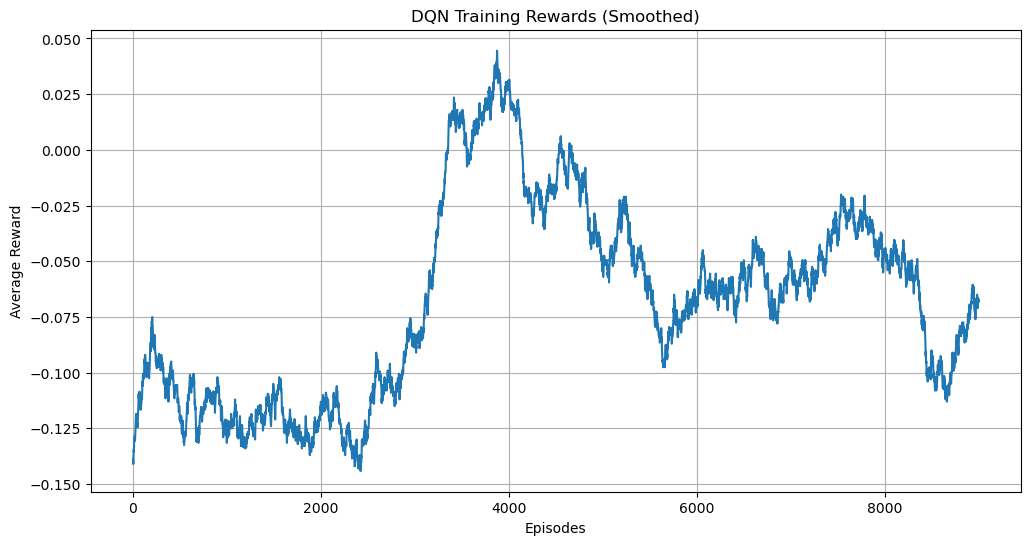

In [24]:
dqn_agent.plot_history(dqn_rewards_history)

In [25]:
print("\n--- Evaluating DQN Agent ---")
dqn_eval = dqn_agent.evaluate(env, num_eval_episodes=5000)

Starting evaluation for 5000 episodes...



--- Evaluating DQN Agent ---


DQN Evaluation: 100%|██████████| 5000/5000 [00:23<00:00, 217.38episode/s, AvgR=-0.03]

--- Evaluation Results ---
Total Episodes: 5000
Average Reward: -0.0329
--------------------------


In [26]:
print("\n--- Training Double DQN Agent ---")

double_dqn_agent = DoubleDQNAgent(env)

# You can reuse training_params or define new ones
double_dqn_rewards_history = double_dqn_agent.fit(env, **training_params)

Double DQN initialized.
Starting Double DQN training for 10000 episodes...



--- Training Double DQN Agent ---


Batch 1/10: 100%|██████████| 1000/1000 [00:05<00:00, 175.01 episode/s, AvgR=-0.14, Eps=0.010, Buf=1201, Steps/Int=1201]
Episode Batch 1000/10000, Avg Reward (last 1000): -0.1365
Batch 2/10: 100%|██████████| 1000/1000 [00:05<00:00, 181.47 episode/s, AvgR=-0.08, Eps=0.010, Buf=2489, Steps/Int=1288]
Episode Batch 2000/10000, Avg Reward (last 1000): -0.0835
Batch 3/10: 100%|██████████| 1000/1000 [00:06<00:00, 162.63 episode/s, AvgR=-0.02, Eps=0.010, Buf=3899, Steps/Int=1410]
Episode Batch 3000/10000, Avg Reward (last 1000): -0.0160
Batch 4/10: 100%|██████████| 1000/1000 [00:06<00:00, 159.50 episode/s, AvgR=-0.02, Eps=0.010, Buf=5372, Steps/Int=1473]
Episode Batch 4000/10000, Avg Reward (last 1000): -0.0210
Batch 5/10: 100%|██████████| 1000/1000 [00:06<00:00, 159.98 episode/s, AvgR=-0.05, Eps=0.010, Buf=6876, Steps/Int=1504]
Episode Batch 5000/10000, Avg Reward (last 1000): -0.0475
Batch 6/10: 100%|██████████| 1000/1000 [00:06<00:00, 150.01 episode/s, AvgR=-0.04, Eps=0.010, Buf=8402, Steps/

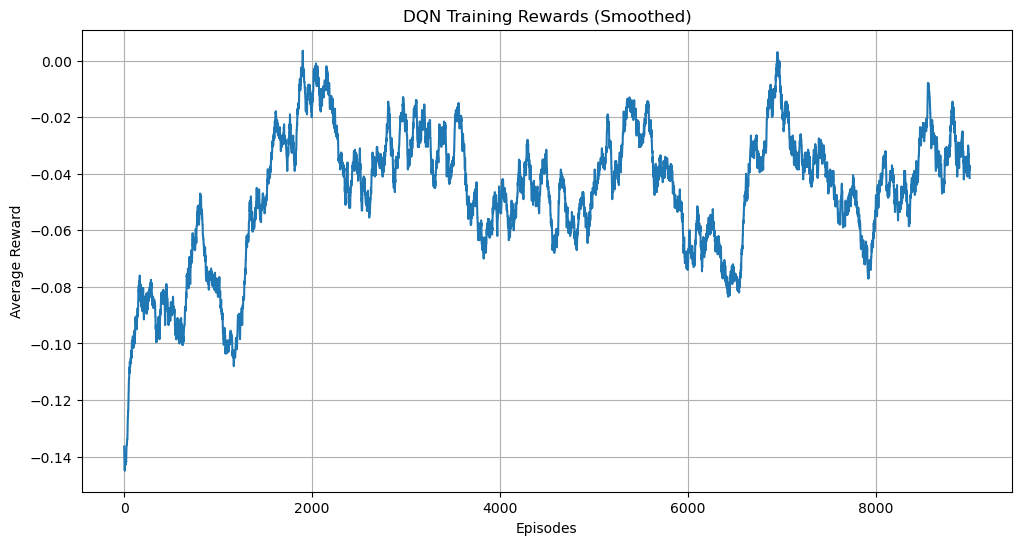

In [27]:
double_dqn_agent.plot_history(double_dqn_rewards_history)

In [28]:
print("\n--- Evaluating Double DQN Agent ---")
ddqn_eval = double_dqn_agent.evaluate(env, num_eval_episodes=5000)

Starting evaluation for 5000 episodes...



--- Evaluating Double DQN Agent ---


Double DQN Evaluation: 100%|██████████| 5000/5000 [00:23<00:00, 213.92episode/s, AvgR=-0.04]

--- Evaluation Results ---
Total Episodes: 5000
Average Reward: -0.0444
--------------------------
